# Import libraries

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn import metrics

# Data Importing

In [161]:
mushroom = pd.read_csv('mushrooms.csv')

# Exploring the dataset

In [162]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [163]:
mushroom.shape

(8124, 23)

In [164]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [165]:
mushroom.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [166]:
mushroom_grouped = mushroom.groupby(['class'])
mushroom_grouped.get_group('p')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
13,p,x,y,w,t,p,f,c,n,k,...,s,w,w,p,w,o,p,n,v,u
17,p,x,s,n,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8114,p,f,y,c,f,m,a,c,b,y,...,y,c,c,p,w,n,n,w,c,d
8116,p,k,y,n,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l
8117,p,k,s,e,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
8118,p,k,y,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d


In [167]:
mushroom_grouped = mushroom.groupby(['class'])
mushroom_grouped.get_group('e')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8115,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,v,l
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l


# Handling missing values

In [168]:
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Splitting data and feature encoding

In [169]:
X = mushroom.iloc[:,1:23]
y = mushroom.iloc[:, 0]

In [170]:
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [171]:
encoder_y=LabelEncoder()
y = encoder_y.fit_transform(y)
y

array([1, 0, 0, ..., 0, 1, 0])

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Built and train different classifiers

In [173]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
                estimators=[('lr', log_clf),('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [174]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    start_time = time.time()
    clf.fit(X_train, y_train)
    training_time = time.time() - start_time
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, round(accuracy_score(y_test, y_pred),3), "Training time {s} seconds ".format(s=round(training_time,2)))

LogisticRegression 0.999 Training time 0.14 seconds 
RandomForestClassifier 1.0 Training time 0.42 seconds 
SVC 1.0 Training time 0.84 seconds 
VotingClassifier 1.0 Training time 1.4 seconds 


Let's check how "soft voting" affects models accuracy. We have added extra trees alghorithm.

In [198]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True, kernel='linear')
extratrees_clf = ExtraTreesClassifier()

voting_clf = VotingClassifier(
                estimators=[('lr', log_clf),('rf', rnd_clf), ('svc', svm_clf), ('extraTrees', extratrees_clf) ], voting='soft')


voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(kernel='linear', probability=True)),
                             ('extraTrees', ExtraTreesClassifier())],
                 voting='soft')

In [199]:
for clf in (log_clf, rnd_clf, svm_clf, extratrees_clf, voting_clf):
    start_time = time.time()
    clf.fit(X_train, y_train)
    training_time = time.time() - start_time
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, round(accuracy_score(y_test, y_pred),3), "Training time {s} seconds ".format(s=round(training_time,2)))

LogisticRegression 0.999 Training time 0.14 seconds 
RandomForestClassifier 1.0 Training time 0.44 seconds 
SVC 1.0 Training time 1.39 seconds 
ExtraTreesClassifier 1.0 Training time 0.5 seconds 
VotingClassifier 1.0 Training time 2.34 seconds 


Let's generate metrics such as classification report.
From this specific classifiers we demand to have a high precision at the cost of recall.
If we throw some delicious mushroom in order to classify all poisonous one, nothing bad happened right? :)

In [200]:
for clf in (log_clf, rnd_clf, svm_clf, extratrees_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, metrics.classification_report(y_test, y_pred))

LogisticRegression               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

RandomForestClassifier               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

SVC               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00     

# Feature importances for random forest

In [178]:
importance_df = pd.DataFrame({'feature': X.columns.values,
                       'importance': rnd_clf.feature_importances_})

ordered_df = importance_df.sort_values(by='importance',ascending=False)
rnd_feat_imp = ordered_df.head(10)
rnd_feat_imp

,feature,importance
22,odor_n,0.143327
28,gill-size_n,0.080453
19,odor_f,0.079227
76,spore-print-color_h,0.051657
17,bruises_t,0.048904
48,stalk-surface-below-ring_k,0.047960
87,population_v,0.038639
82,spore-print-color_w,0.036385
75,ring-type_p,0.036106
46,stalk-surface-above-ring_s,0.031570


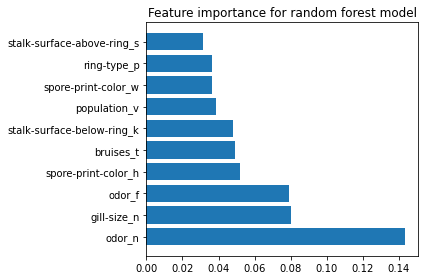

In [179]:
imp_range=range(1,len(rnd_feat_imp.index)+1)
 
height = rnd_feat_imp['importance']
bars = rnd_feat_imp['feature']
y_pos = np.arange(len(bars))

plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title("Feature importance for random forest")

plt.tight_layout()
plt.show()

In [187]:
importance_df = pd.DataFrame({'feature': X.columns.values,
                       'importance': extratrees_clf.feature_importances_})
 
ordered_df = importance_df.sort_values(by='importance',ascending=False)
extra_feat_imp = ordered_df.head(10)
extra_feat_imp

,feature,importance
22,odor_n,0.158311
28,gill-size_n,0.091781
19,odor_f,0.066930
48,stalk-surface-below-ring_k,0.054251
76,spore-print-color_h,0.053569
45,stalk-surface-above-ring_k,0.052999
75,ring-type_p,0.044236
17,bruises_t,0.033634
82,spore-print-color_w,0.031944
87,population_v,0.028324


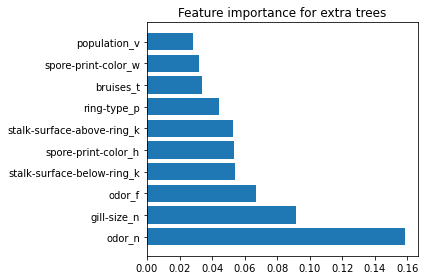

In [196]:
imp_range=range(1,len(extra_feat_imp.index)+1)
 
height = extra_feat_imp['importance']
bars = extra_feat_imp['feature']
y_pos = np.arange(len(bars))

plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title("Feature importance for extra trees")

plt.tight_layout()
plt.show()

In [193]:
importance_df = pd.DataFrame({'feature': X.columns.values,
                       'importance': log_clf.coef_[0]})

ordered_df = importance_df.sort_values(by='importance',ascending=False)
log_feat_imp = ordered_df.head(10)
log_feat_imp

,feature,importance
80,spore-print-color_r,4.149137
18,odor_c,3.251241
28,gill-size_n,3.217303
19,odor_f,2.935930
23,odor_p,2.914138
41,stalk-root_b,2.252727
45,stalk-surface-above-ring_k,1.742805
84,population_c,1.565907
50,stalk-surface-below-ring_y,1.489611
24,odor_s,1.276674


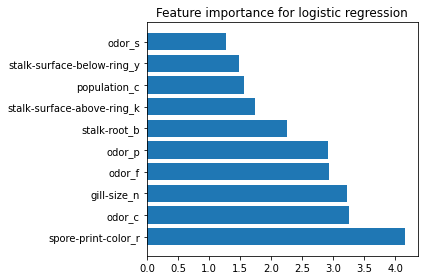

In [204]:
imp_range=range(1,len(log_feat_imp.index)+1)
 
height = log_feat_imp['importance']
bars = log_feat_imp['feature']
y_pos = np.arange(len(bars))

plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title("Feature importance for logistic regression")

plt.tight_layout()
plt.show()

In [201]:
importance_df = pd.DataFrame({'feature': X.columns.values,
                       'importance': svm_clf.coef_[0]})

ordered_df = importance_df.sort_values(by='importance',ascending=False)
svc_feat_imp = ordered_df.head(10)
svc_feat_imp

,feature,importance
80,spore-print-color_r,1.989253
18,odor_c,1.530897
23,odor_p,1.076355
45,stalk-surface-above-ring_k,1.040532
84,population_c,0.993965
28,gill-size_n,0.961458
19,odor_f,0.781926
50,stalk-surface-below-ring_y,0.599815
25,odor_y,0.577528
24,odor_s,0.577516


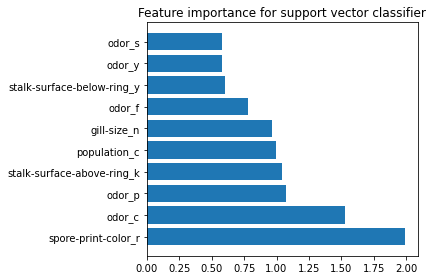

In [202]:
imp_range=range(1,len(svc_feat_imp.index)+1)
 
height = svc_feat_imp['importance']
bars = svc_feat_imp['feature']
y_pos = np.arange(len(bars))

plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title("Feature importance for support vector classifier")

plt.tight_layout()
plt.show()